<a href="https://colab.research.google.com/github/HashimFadhan/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


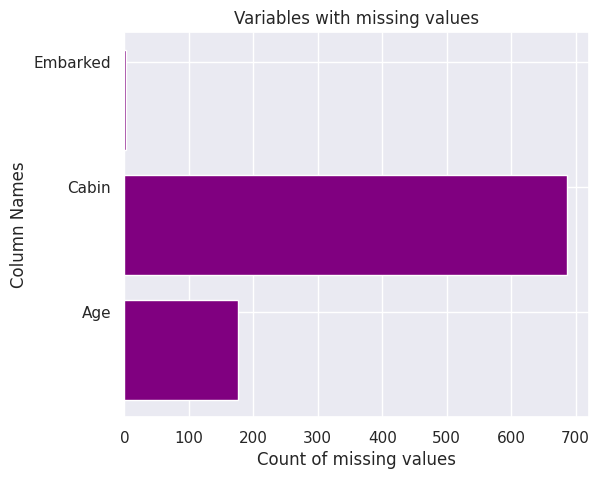

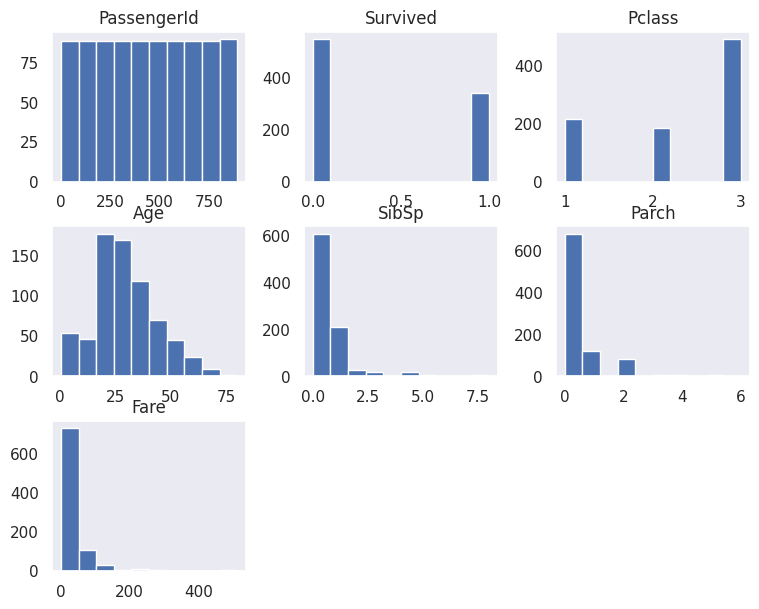

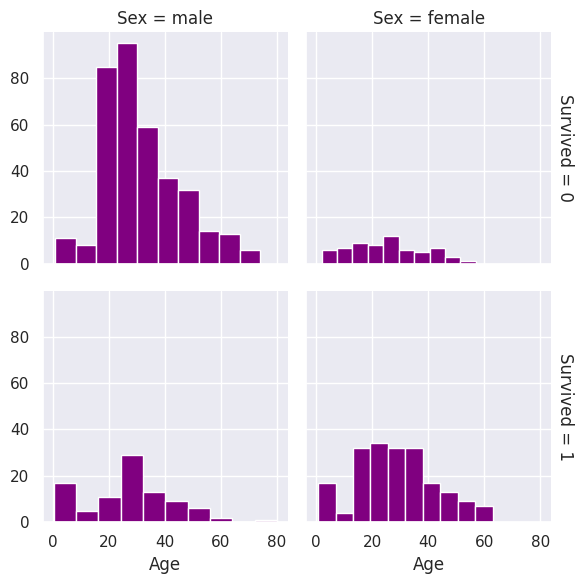

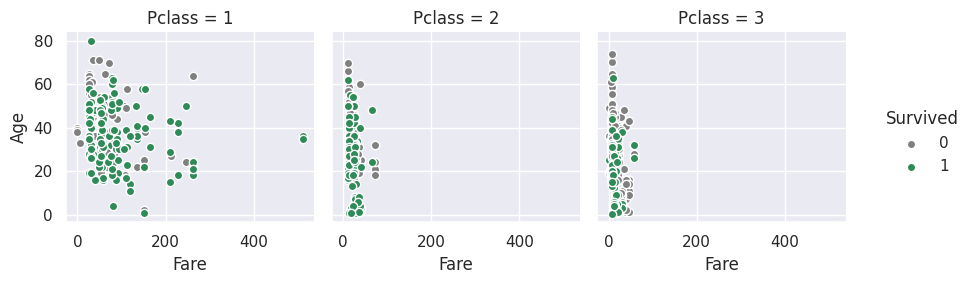

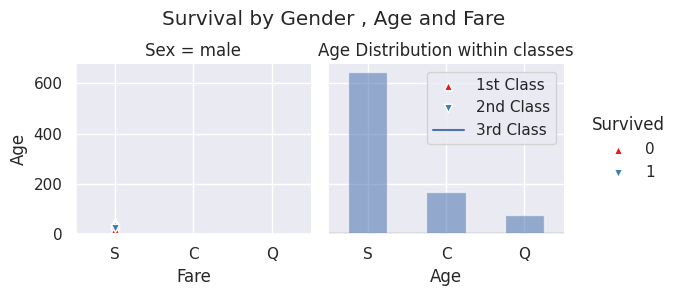

In [5]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd
#for numerical computaions we can use numpy library
import numpy as np
titanic = pd.read_csv("/content/drive/MyDrive/train/train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()
titanic_test = pd.read_csv("/content/drive/MyDrive/test/test.csv")

titanic_test.head().T
titanic.shape
titanic.describe()
titanic.info()

null_columns=titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

titanic_test.isnull().sum()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)



labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(titanic[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

titanic.hist(bins=10,figsize=(9,7),grid=False);

g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

titanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");



titanic.Age[titanic.Pclass == 1].plot(kind='kde')
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;